# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import yfinance as yf
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes

## Options Data

In [2]:
current_dir = os.getcwd()
# print("Current directory:", current_dir)

# Read the CSV file into a DataFrame
options_data_file = '../data/AMD_OptionPrices.csv'

options_data = pd.read_csv(options_data_file)

In [3]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889630 entries, 0 to 889629
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   secid             889630 non-null  int64  
 1   date              889630 non-null  object 
 2   symbol            889630 non-null  object 
 3   symbol_flag       889630 non-null  int64  
 4   exdate            889630 non-null  object 
 5   last_date         822401 non-null  object 
 6   cp_flag           889630 non-null  object 
 7   strike_price      889630 non-null  int64  
 8   best_bid          889630 non-null  float64
 9   best_offer        889630 non-null  float64
 10  volume            889630 non-null  int64  
 11  open_interest     889630 non-null  int64  
 12  impl_volatility   735098 non-null  float64
 13  delta             735098 non-null  float64
 14  gamma             735098 non-null  float64
 15  vega              735098 non-null  float64
 16  theta             73

In [4]:
options_data.sample(25)

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
292549,101121,2021-10-08,AMD 211112P125000,1,2021-11-12,NaN,P,125000,20.40,20.60,0,0,0.409859,-0.904226,0.012787,5.526910,-11.725300,142826737,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
809055,101121,2022-11-30,AMD 230120C67500,1,2023-01-20,2022-11-30,C,67500,12.45,12.55,118,6486,0.539427,0.794190,0.018191,8.261998,-17.869900,135979316,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
317516,101121,2021-11-02,AMD 220121P60000,1,2022-01-21,2021-11-02,P,60000,0.05,0.06,179,22979,0.648786,-0.004154,0.000317,0.735221,-1.085074,131204702,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
729623,101121,2022-09-15,AMD1 240119P270000,1,2024-01-19,2022-01-24,P,270000,135.50,140.00,0,2,NaN,NaN,NaN,NaN,NaN,143518160,1,0,172,1,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
874644,101121,2023-02-09,AMD1 240119P160000,1,2024-01-19,2022-12-05,P,160000,29.50,32.95,0,15,NaN,NaN,NaN,NaN,NaN,142413464,1,0,172,1,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
643218,101121,2022-07-07,AMD 220729C30000,1,2022-07-29,2022-06-24,C,30000,47.65,50.85,0,1,NaN,NaN,NaN,NaN,NaN,147860866,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
464693,101121,2022-03-02,AMD1 220401C210000,1,2022-04-01,NaN,C,210000,8.50,12.10,0,0,NaN,NaN,NaN,NaN,NaN,145260192,1,0,172,1,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
190316,101121,2021-07-01,AMD 210806C100000,1,2021-08-06,2021-07-01,C,100000,2.57,2.72,372,632,0.440869,0.333645,0.028148,10.660970,-23.849990,141058693,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
51686,101121,2021-02-18,AMD 210917C55000,1,2021-09-17,2021-02-17,C,55000,33.70,37.40,0,358,0.554906,0.910515,0.004325,10.886240,-5.297091,134536642,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
858016,101121,2023-01-23,AMD 250117C110000,1,2025-01-17,2023-01-23,C,110000,10.95,11.40,86,2249,0.429249,0.444093,0.008531,42.610810,-5.689482,149533908,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN


#### Options Data Features

Let's define the features of our data set.

|secid:| Security ID, a unique identifier for each security.|
|---|---|
|date:| Date of the options data.|
|symbol:| Symbol of the security.|
|symbol_flag:| Flag indicating the type of symbol.|
|exdate:| Expiration date of the option.|
|last_date:| Last trading date of the option.|
|cp_flag:| Call (C) or Put (P) option flag.|
|strike_price:| Strike price of the option.|
|best_bid:| Best bid price for the option.|
|best_offer:| Best offer price for the option.|
|volume: Volume| of contracts traded.|
|open_interest:| Open interest for the option.|
|impl_volatility:| Implied volatility of the option.|
|delta:| Delta value of the option.|
|gamma:| Gamma value of the option.|
|vega:| Vega value of the option.|
|theta:| Theta value of the option.|
|optionid:| Option ID, a unique identifier for each option.|
|cfadj:| Adjustment factor for cash flow.|
|am_settlement:| American-style settlement flag.|
|contract_size:| Size of the contract.|
|ss_flag:| Special security flag.|
|expiry_indicator:| Expiry indicator, 'w' meaning weekly|
|cusip:| CUSIP number, a unique identifier for securities in the U.S. and Canada.|
|ticker: | Ticker symbol of the security.|
|sic:| Standard Industrial Classification (SIC) code.|
|index_flag:| Index security flag.|
|exchange_d:| Exchange identifier.|
|issue_type:| Type of issue.|
|industry_group:| Industry group.|
|issuer:| Issuer of the security.|
|exercise_style:| Exercise style of the option (e.g., American or European).|

In [5]:
# Keeping only relevent columns
relevant_columns = ['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
                   'best_bid', 'best_offer', 'volume', 'open_interest',
                   'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'ticker']
relevant_options_data = options_data[relevant_columns]

In [6]:
# Looking for null values in the remaining features
relevant_options_data.isnull().sum()

date                    0
symbol                  0
exdate                  0
last_date           67229
cp_flag                 0
strike_price            0
best_bid                0
best_offer              0
volume                  0
open_interest           0
impl_volatility    154532
delta              154532
gamma              154532
vega               154532
theta              154532
ticker                  0
dtype: int64

In [7]:
# Dropping the remaining rows with missing values
relevant_options_data.dropna(axis=0,subset=['last_date','impl_volatility','delta','gamma','vega','theta'],inplace=True)

C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\2665682092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_options_data.dropna(axis=0,subset=['last_date','impl_volatility','delta','gamma','vega','theta'],inplace=True)


In [8]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694721 entries, 0 to 889549
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             694721 non-null  object 
 1   symbol           694721 non-null  object 
 2   exdate           694721 non-null  object 
 3   last_date        694721 non-null  object 
 4   cp_flag          694721 non-null  object 
 5   strike_price     694721 non-null  int64  
 6   best_bid         694721 non-null  float64
 7   best_offer       694721 non-null  float64
 8   volume           694721 non-null  int64  
 9   open_interest    694721 non-null  int64  
 10  impl_volatility  694721 non-null  float64
 11  delta            694721 non-null  float64
 12  gamma            694721 non-null  float64
 13  vega             694721 non-null  float64
 14  theta            694721 non-null  float64
 15  ticker           694721 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory u

#### Categorical & Numerical Features

In [9]:
# Exploring categorical columns
print("\nUnique values in symbol column:", relevant_options_data['symbol'].unique())
print("\nUnique values in cp_flag column:", relevant_options_data['cp_flag'].unique())
print("\nUnique values in ticker column:", relevant_options_data['ticker'].unique())


Unique values in symbol column: ['AMD 210108C100000' 'AMD 210108C101000' 'AMD 210108C102000' ...
 'AMD 230406C55000' 'AMD 230406C66000' 'AMD 230406P84000']

Unique values in cp_flag column: ['C' 'P']

Unique values in ticker column: ['AMD']


In [10]:
# Exploring numerical columns
print("Summary statistics of numerical columns:\n", relevant_options_data.describe())

Summary statistics of numerical columns:
         strike_price       best_bid     best_offer         volume  \
count  694721.000000  694721.000000  694721.000000  694721.000000   
mean   107015.412662      16.315057      16.985467     381.943520   
std     48378.206134      25.679887      26.352151    2217.855544   
min      5000.000000       0.000000       0.010000       0.000000   
25%     75000.000000       0.670000       0.780000       0.000000   
50%     97000.000000       5.600000       5.950000      12.000000   
75%    132000.000000      20.700000      21.700000     100.000000   
max    300000.000000     241.650000     244.850000  211655.000000   

       open_interest  impl_volatility          delta          gamma  \
count  694721.000000    694721.000000  694721.000000  694721.000000   
mean     2398.261724         0.621639       0.011665       0.013074   
std      5583.527659         0.306761       0.572552       0.016014   
min         0.000000         0.128793      -0.999993

In [11]:
# Converting necessary columns to datetime objects
relevant_options_data['date'] = pd.to_datetime(relevant_options_data['date'])
relevant_options_data['exdate'] = pd.to_datetime(relevant_options_data['exdate'])
relevant_options_data['last_date'] = pd.to_datetime(relevant_options_data['last_date'])

C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\3794372134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_options_data['date'] = pd.to_datetime(relevant_options_data['date'])
C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\3794372134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_options_data['exdate'] = pd.to_datetime(relevant_options_data['exdate'])
C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\3794372134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [12]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694721 entries, 0 to 889549
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             694721 non-null  datetime64[ns]
 1   symbol           694721 non-null  object        
 2   exdate           694721 non-null  datetime64[ns]
 3   last_date        694721 non-null  datetime64[ns]
 4   cp_flag          694721 non-null  object        
 5   strike_price     694721 non-null  int64         
 6   best_bid         694721 non-null  float64       
 7   best_offer       694721 non-null  float64       
 8   volume           694721 non-null  int64         
 9   open_interest    694721 non-null  int64         
 10  impl_volatility  694721 non-null  float64       
 11  delta            694721 non-null  float64       
 12  gamma            694721 non-null  float64       
 13  vega             694721 non-null  float64       
 14  theta            694721 n

In [13]:
# We look at the data again
relevant_options_data.head(25)

,date,symbol,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,ticker
0,2021-01-04,AMD 210108C100000,2021-01-08,2021-01-04,C,100000,0.19,0.20,13744,6736,0.542276,0.083361,0.029276,1.481987,-36.679020,AMD
1,2021-01-04,AMD 210108C101000,2021-01-08,2021-01-04,C,101000,0.14,0.15,4229,986,0.553831,0.063693,0.023335,1.204094,-30.493600,AMD
2,2021-01-04,AMD 210108C102000,2021-01-08,2021-01-04,C,102000,0.10,0.11,3729,2531,0.562234,0.047623,0.018270,0.959573,-24.604400,AMD
3,2021-01-04,AMD 210108C103000,2021-01-08,2021-01-04,C,103000,0.07,0.08,688,706,0.569473,0.035131,0.014096,0.750143,-19.474900,AMD
4,2021-01-04,AMD 210108C104000,2021-01-08,2021-01-04,C,104000,0.05,0.06,376,1070,0.579418,0.026341,0.010916,0.589210,-15.612930,AMD
5,2021-01-04,AMD 210108C105000,2021-01-08,2021-01-04,C,105000,0.03,0.05,1163,1839,0.588415,0.019584,0.008373,0.460541,-12.350510,AMD
6,2021-01-04,AMD 210108C106000,2021-01-08,2021-01-04,C,106000,0.02,0.03,311,423,0.585248,0.012912,0.005891,0.322671,-8.596650,AMD
7,2021-01-04,AMD 210108C107000,2021-01-08,2021-01-04,C,107000,0.01,0.03,157,246,0.601759,0.010301,0.004710,0.264408,-7.266296,AMD
8,2021-01-04,AMD 210108C108000,2021-01-08,2021-01-04,C,108000,0.02,0.03,2476,336,0.652602,0.011728,0.004862,0.296744,-8.820686,AMD
9,2021-01-04,AMD 210108C109000,2021-01-08,2021-01-04,C,109000,0.00,0.03,98,139,0.643981,0.007471,0.003321,0.199958,-5.867177,AMD


In [14]:
relevant_options_data.tail()

,date,symbol,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,ticker
889545,2023-02-28,AMD 250117P75000,2025-01-17,2023-02-28,P,75000,13.70,14.60,170,5543,0.457119,-0.321366,0.008040,37.87596,-3.220877,AMD
889546,2023-02-28,AMD 250117P80000,2025-01-17,2023-02-28,P,80000,16.15,16.80,39,6367,0.446780,-0.365991,0.008845,39.59595,-3.194466,AMD
889547,2023-02-28,AMD 250117P85000,2025-01-17,2023-02-28,P,85000,18.95,19.45,524,1625,0.441702,-0.410975,0.009490,40.70197,-3.147415,AMD
889548,2023-02-28,AMD 250117P90000,2025-01-17,2023-02-27,P,90000,21.70,22.40,0,3590,0.434930,-0.458053,0.010167,41.29159,-3.041630,AMD
889549,2023-02-28,AMD 250117P95000,2025-01-17,2023-02-28,P,95000,24.80,25.65,1,1566,0.431461,-0.504043,0.010686,40.98265,-2.907276,AMD


There are a few columns we would like to add that will be helpful in our analysis of the data set such as days-to-expiration, or dte, and the bid/ask spread.

In [15]:
# Computing dte and bid/ask spread
relevant_options_data['dte'] = (relevant_options_data['exdate'] - relevant_options_data['date']).dt.days
relevant_options_data['bid_ask_spread'] = relevant_options_data.best_offer-relevant_options_data.best_bid

C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\1487712359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_options_data['dte'] = (relevant_options_data['exdate'] - relevant_options_data['date']).dt.days
C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\1487712359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_options_data['bid_ask_spread'] = relevant_options_data.best_offer-relevant_options_data.best_bid


In [16]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694721 entries, 0 to 889549
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             694721 non-null  datetime64[ns]
 1   symbol           694721 non-null  object        
 2   exdate           694721 non-null  datetime64[ns]
 3   last_date        694721 non-null  datetime64[ns]
 4   cp_flag          694721 non-null  object        
 5   strike_price     694721 non-null  int64         
 6   best_bid         694721 non-null  float64       
 7   best_offer       694721 non-null  float64       
 8   volume           694721 non-null  int64         
 9   open_interest    694721 non-null  int64         
 10  impl_volatility  694721 non-null  float64       
 11  delta            694721 non-null  float64       
 12  gamma            694721 non-null  float64       
 13  vega             694721 non-null  float64       
 14  theta            694721 n

### Save cleaned options data

In [17]:
# Sort data by date
#cleaned_option_data = relevant_options_data.sort_values(by='date')

# cleaned_option_data_file = '../data/AMD_option_data_2015.1.1_2023.2.28_cleaned.csv'
#cleaned_option_data_file = '../data/1.AMD_OptionPrices_cleaned.csv'

#if os.path.exists(cleaned_option_data_file):
    # If file exists, load it directly
#    print('Cleaned options data saved')
#else:    
    # Save cleaned options data as csv
#    df.to_csv(cleaned_option_data_file, index=False)
    
#print(df.info())

In [18]:
# Looking at the span of time our data covers
start_date = relevant_options_data['date'].min()
end_date = relevant_options_data['date'].max()

print(f'start_date: {start_date}, end_date: {end_date}')

start_date: 2021-01-04 00:00:00, end_date: 2023-02-28 00:00:00


In [19]:
(start_date - end_date).days

-785

## Stock Data
We need to add the prices of the underlying asset of the option (in this case: the price of AMD stock). To do this we will download the stock data from Yahoo finance that corresponds with same time span.

In [20]:
tickers = relevant_options_data['ticker'].unique()

print(tickers)

# Downloading historical stock data of the correspoonding ticker
stock_data = {}
for ticker in tickers:
    start_date = relevant_options_data['date'].min()-pd.Timedelta(days=90)
    end_date = relevant_options_data['date'].max()+pd.Timedelta(days=1)

    print(f'Downloading data of {ticker} from start_date: {start_date} to end_date:{end_date}')
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    stock_data[ticker]['ticker'] = ticker  # Add a new column 'Ticker' with ticker symbol
    # print(stock_data[ticker].info())


['AMD']


[*********************100%%**********************]  1 of 1 completed


In [21]:
# Merging stock data from Yahoo finance into a single DataFrame
merged_stock_data = pd.concat(stock_data.values())
merged_stock_data['date'] = merged_stock_data.index
merged_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       603 non-null    float64       
 1   High       603 non-null    float64       
 2   Low        603 non-null    float64       
 3   Close      603 non-null    float64       
 4   Adj Close  603 non-null    float64       
 5   Volume     603 non-null    int64         
 6   ticker     603 non-null    object        
 7   date       603 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 42.4+ KB


### Clean stock data

In [22]:
# Sorting values by date
merged_stock_data=merged_stock_data.sort_values(by='date')

In [23]:
merged_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,ticker,date
Date,,,,,,,,
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400,AMD,2020-10-06
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,43045700,AMD,2020-10-07
2020-10-08,88.110001,88.720001,85.949997,86.510002,86.510002,54240700,AMD,2020-10-08
2020-10-09,84.739998,85.750000,82.349998,83.099998,83.099998,80354400,AMD,2020-10-09
2020-10-12,83.650002,85.129997,83.120003,84.290001,84.290001,47669700,AMD,2020-10-12


### Financial Analysis of Stock data

#### Compute daily stock return

In [24]:
stock_data=merged_stock_data.copy()

mapper={'Open':'stock_open', 
        'High':'stock_high', 
        'Low': 'stock_low', 
        'Close':'stock_close', 
        'Adj Close':'stock_price', 
        'Volume':'stock_volume'}
stock_data=stock_data.rename(columns=mapper).copy()

# Calculate daily returns
stock_data['daily_returns'] = stock_data['stock_price'].pct_change()

# Replace NA values with 0
stock_data.fillna(0, inplace=True)


In [25]:
stock_data

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns
Date,,,,,,,,,
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400,AMD,2020-10-06,0.000000
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,43045700,AMD,2020-10-07,0.026160
2020-10-08,88.110001,88.720001,85.949997,86.510002,86.510002,54240700,AMD,2020-10-08,-0.002076
2020-10-09,84.739998,85.750000,82.349998,83.099998,83.099998,80354400,AMD,2020-10-09,-0.039417
2020-10-12,83.650002,85.129997,83.120003,84.290001,84.290001,47669700,AMD,2020-10-12,0.014320
...,...,...,...,...,...,...,...,...,...
2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800,AMD,2023-02-22,-0.002084
2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300,AMD,2023-02-23,0.040987
2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000,AMD,2023-02-24,-0.020815


#### Compute 30 days rolling volatility

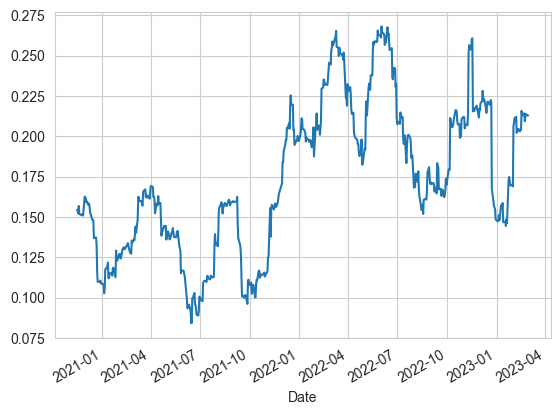

In [26]:
# Define the minimum of periods to consider 
min_periods = 30

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 30 non-null data points are in the window.
stock_data['vol_30'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_30'] = stock_data['vol_30'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_30'].plot()

# Show the plot
plt.show()

#### Compute 60 days rolling volatility

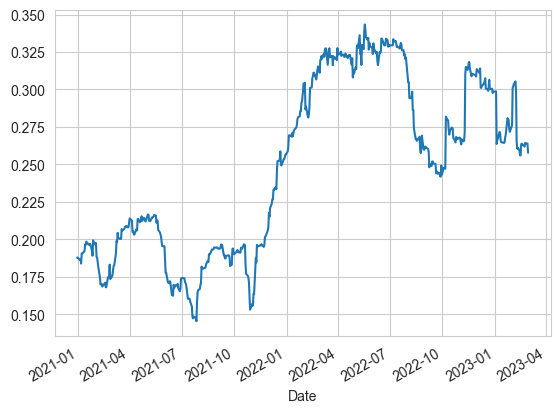

In [27]:
# Define the minimum of periods to consider 
min_periods = 60

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 60 non-null data points are in the window.
stock_data['vol_60'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_60'] = stock_data['vol_60'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_60'].plot()

# Show the plot
plt.show()

#### Compute 90 days rolling volatility

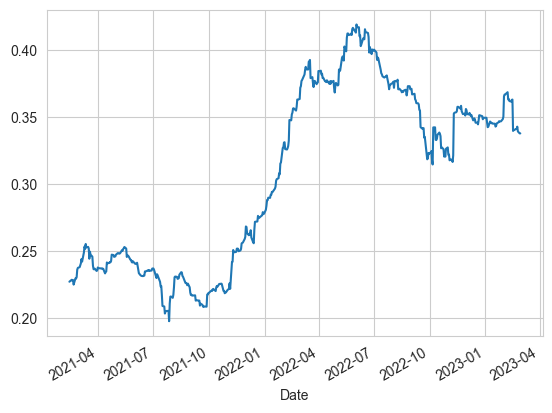

In [28]:
# Define the minimum of periods to consider 
min_periods = 90

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 90 non-null data points are in the window.
stock_data['vol_90'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_90'] = stock_data['vol_90'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_90'].plot()

# Show the plot
plt.show()

In [29]:
# Replace NA values with 0
stock_data.fillna(0, inplace=True)

In [30]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     603 non-null    float64       
 1   stock_high     603 non-null    float64       
 2   stock_low      603 non-null    float64       
 3   stock_close    603 non-null    float64       
 4   stock_price    603 non-null    float64       
 5   stock_volume   603 non-null    int64         
 6   ticker         603 non-null    object        
 7   date           603 non-null    datetime64[ns]
 8   daily_returns  603 non-null    float64       
 9   vol_30         603 non-null    float64       
 10  vol_60         603 non-null    float64       
 11  vol_90         603 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 61.2+ KB


In [48]:
pd.reset_option('display.max_rows',None)

In [32]:
stock_data.head(100)

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90
Date,,,,,,,,,,,,
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400,AMD,2020-10-06,0.000000,0.000000,0.000000,0.000000
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,43045700,AMD,2020-10-07,0.026160,0.000000,0.000000,0.000000
2020-10-08,88.110001,88.720001,85.949997,86.510002,86.510002,54240700,AMD,2020-10-08,-0.002076,0.000000,0.000000,0.000000
2020-10-09,84.739998,85.750000,82.349998,83.099998,83.099998,80354400,AMD,2020-10-09,-0.039417,0.000000,0.000000,0.000000
2020-10-12,83.650002,85.129997,83.120003,84.290001,84.290001,47669700,AMD,2020-10-12,0.014320,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,83.400002,85.110001,79.360001,84.739998,84.739998,49720900,AMD,2021-02-23,-0.007380,0.127794,0.174630,0.229391
2021-02-24,84.330002,87.089996,82.809998,86.940002,86.940002,40821200,AMD,2021-02-24,0.025962,0.127232,0.175499,0.230453
2021-02-25,86.169998,87.089996,81.919998,82.419998,82.419998,54625100,AMD,2021-02-25,-0.051990,0.135364,0.183020,0.236029


In [33]:
cutoff_date='2021-01-04'

In [34]:
stock_data = stock_data[stock_data.index >= cutoff_date]

In [35]:
pd.set_option('display.max_rows',None)

In [36]:
stock_data

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90
Date,,,,,,,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04,0.006433,0.108051,0.186191,0.000000
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05,0.005092,0.102737,0.186196,0.000000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06,-0.026302,0.106025,0.183714,0.000000
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07,0.053471,0.117649,0.190502,0.000000
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08,-0.006095,0.117887,0.190440,0.000000
2021-01-11,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,AMD,2021-01-11,0.028230,0.119436,0.191629,0.000000
2021-01-12,97.860001,98.970001,94.070000,95.360001,95.360001,67672300,AMD,2021-01-12,-0.019434,0.121705,0.192287,0.000000
2021-01-13,93.010002,93.889999,90.839996,91.779999,91.779999,60712900,AMD,2021-01-13,-0.037542,0.111897,0.196426,0.000000
2021-01-14,91.769997,92.360001,90.449997,90.790001,90.790001,53408200,AMD,2021-01-14,-0.010787,0.112405,0.196181,0.000000


### Save Cleaned Stock data

In [37]:
# cleaned_stock_data_file = '../data/AMD_stock_data_2015.1.1_2023.2.28_cleaned.csv'
#cleaned_stock_data_file = '../data/2.AMD_stock_prices_cleaned.csv'

#if os.path.exists(cleaned_stock_data_file):
    # If file exists, load it directly
#    print('Cleaned stock data saved')
#else:    
    # Save cleaned options data as csv
#    stock_data.to_csv(cleaned_stock_data_file, index=False)
    
#print(stock_data.info())

## Risk-Free Rate

We download 10-year Treasury bond from Yahoo Finance to represent risk-free rate

In [39]:
def get_risk_free_rate(start_date, end_date):
    """
    Fetches historical data for the 10-year Treasury bond from Yahoo Finance and computes the risk-free rate.
    Returns the risk-free rate as a percentage.
    """
    # Ticker symbol for the 10-year Treasury bond
    ticker_symbol = "^TNX"

    # Fetch historical data
    treasury_bond_data = yf.download(ticker_symbol, 
                                     start=start_date, 
                                     end=end_date)
    treasury_bond_data['date'] = treasury_bond_data.index
    treasury_bond_data=treasury_bond_data[['date', 'Adj Close']]
    treasury_bond_data=treasury_bond_data.rename(columns={'Adj Close':'risk_free_rate'}).copy()

    return treasury_bond_data


start_date = stock_data['date'].min()
end_date = stock_data['date'].max()+pd.Timedelta(days=1)

treasury_bond_data = get_risk_free_rate(start_date, end_date)


print(treasury_bond_data.describe())

[*********************100%%**********************]  1 of 1 completed

                                date  risk_free_rate
count                            542      542.000000
mean   2022-01-29 15:56:27.453874432        2.301026
min              2021-01-04 00:00:00        0.917000
25%              2021-07-19 06:00:00        1.494000
50%              2022-01-29 12:00:00        1.791500
75%              2022-08-14 06:00:00        3.119750
max              2023-02-28 00:00:00        4.234000
std                              NaN        0.963000


In [40]:
treasury_bond_data

,date,risk_free_rate
Date,,
2021-01-04,2021-01-04,0.917
2021-01-05,2021-01-05,0.955
2021-01-06,2021-01-06,1.042
2021-01-07,2021-01-07,1.071
2021-01-08,2021-01-08,1.105
2021-01-11,2021-01-11,1.132
2021-01-12,2021-01-12,1.138
2021-01-13,2021-01-13,1.088
2021-01-14,2021-01-14,1.129


In [42]:
treasury_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            542 non-null    datetime64[ns]
 1   risk_free_rate  542 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


In [42]:
# Saving Risk Free Rate
#TNX_data_file = '../data/3.TNX21_23.csv'
#treasury_bond_data.to_csv(TNX_data_file, index=False)

## Merge Risk-Free Rate to stock data

In [44]:
# Convert 'date' column to datetime type in the DataFrame
stock_data['date'] = pd.to_datetime(stock_data['date'])
treasury_bond_data['date'] = pd.to_datetime(treasury_bond_data['date'])

# Merge options data and stock data based on common columns (date)
stock_and_bond_data = pd.merge(stock_data, treasury_bond_data, on=['date'], how='left')

# Print or further process the combined data
stock_and_bond_data

C:\Users\uriah\AppData\Local\Temp\ipykernel_12756\2593581763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['date'])


,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
0,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04,0.006433,0.108051,0.186191,0.000000,0.917
1,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05,0.005092,0.102737,0.186196,0.000000,0.955
2,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06,-0.026302,0.106025,0.183714,0.000000,1.042
3,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07,0.053471,0.117649,0.190502,0.000000,1.071
4,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08,-0.006095,0.117887,0.190440,0.000000,1.105
5,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,AMD,2021-01-11,0.028230,0.119436,0.191629,0.000000,1.132
6,97.860001,98.970001,94.070000,95.360001,95.360001,67672300,AMD,2021-01-12,-0.019434,0.121705,0.192287,0.000000,1.138
7,93.010002,93.889999,90.839996,91.779999,91.779999,60712900,AMD,2021-01-13,-0.037542,0.111897,0.196426,0.000000,1.088
8,91.769997,92.360001,90.449997,90.790001,90.790001,53408200,AMD,2021-01-14,-0.010787,0.112405,0.196181,0.000000,1.129
9,90.750000,91.589996,87.860001,88.209999,88.209999,49340300,AMD,2021-01-15,-0.028417,0.115006,0.198404,0.000000,1.097


In [45]:
len(stock_and_bond_data)

542

In [49]:
# Keep relevent columns of stock data only
columns_to_keep = ['date', 'ticker', 'stock_volume', 'stock_price',
                   'daily_returns', 'vol_30', 'vol_60', 'vol_90', 'risk_free_rate']
stock_and_bond_data = stock_and_bond_data[columns_to_keep]

# Merge options data and stock data based on common columns (ticker and date)
df = pd.merge(relevant_options_data, stock_and_bond_data, on=['ticker', 'date'], how='left')

# Print or further process the combined data
df

,date,symbol,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,ticker,dte,bid_ask_spread,stock_volume,stock_price,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
0,2021-01-04,AMD 210108C100000,2021-01-08,2021-01-04,C,100000,0.19,0.20,13744,6736,0.542276,0.083361,0.029276,1.481987,-36.679020,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
1,2021-01-04,AMD 210108C101000,2021-01-08,2021-01-04,C,101000,0.14,0.15,4229,986,0.553831,0.063693,0.023335,1.204094,-30.493600,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
2,2021-01-04,AMD 210108C102000,2021-01-08,2021-01-04,C,102000,0.10,0.11,3729,2531,0.562234,0.047623,0.018270,0.959573,-24.604400,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
3,2021-01-04,AMD 210108C103000,2021-01-08,2021-01-04,C,103000,0.07,0.08,688,706,0.569473,0.035131,0.014096,0.750143,-19.474900,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
4,2021-01-04,AMD 210108C104000,2021-01-08,2021-01-04,C,104000,0.05,0.06,376,1070,0.579418,0.026341,0.010916,0.589210,-15.612930,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694716,2023-02-28,AMD 250117P75000,2025-01-17,2023-02-28,P,75000,13.70,14.60,170,5543,0.457119,-0.321366,0.008040,37.875960,-3.220877,AMD,689,0.90,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
694717,2023-02-28,AMD 250117P80000,2025-01-17,2023-02-28,P,80000,16.15,16.80,39,6367,0.446780,-0.365991,0.008845,39.595950,-3.194466,AMD,689,0.65,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
694718,2023-02-28,AMD 250117P85000,2025-01-17,2023-02-28,P,85000,18.95,19.45,524,1625,0.441702,-0.410975,0.009490,40.701970,-3.147415,AMD,689,0.50,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
694719,2023-02-28,AMD 250117P90000,2025-01-17,2023-02-27,P,90000,21.70,22.40,0,3590,0.434930,-0.458053,0.010167,41.291590,-3.041630,AMD,689,0.70,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694721 entries, 0 to 694720
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             694721 non-null  datetime64[ns]
 1   symbol           694721 non-null  object        
 2   exdate           694721 non-null  datetime64[ns]
 3   last_date        694721 non-null  datetime64[ns]
 4   cp_flag          694721 non-null  object        
 5   strike_price     694721 non-null  int64         
 6   best_bid         694721 non-null  float64       
 7   best_offer       694721 non-null  float64       
 8   volume           694721 non-null  int64         
 9   open_interest    694721 non-null  int64         
 10  impl_volatility  694721 non-null  float64       
 11  delta            694721 non-null  float64       
 12  gamma            694721 non-null  float64       
 13  vega             694721 non-null  float64       
 14  theta            694

In [51]:
df.sample(25)

,date,symbol,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,ticker,dte,bid_ask_spread,stock_volume,stock_price,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
646580,2022-12-16,AMD 221223C105000,2022-12-23,2022-12-15,C,105000,0.00,0.01,0,236,1.138357,0.001753,0.000546,0.050986,-1.518550,AMD,7,0.01,62438600,65.410004,-0.016834,0.221378,0.300573,0.345574,3.482
173413,2021-07-13,AMD 230120C105000,2023-01-20,2021-07-13,C,105000,12.95,13.10,5,3761,0.408559,0.483873,0.008756,44.404210,-6.028018,AMD,556,0.15,30367600,90.260002,-0.006057,0.109665,0.160054,0.223464,1.415
5258,2021-01-07,AMD 210716P97500,2021-07-16,2021-01-04,P,97500,14.90,16.10,0,43,0.520539,-0.450272,0.011080,27.179330,-13.489420,AMD,190,1.20,42897200,95.160004,0.053471,0.117649,0.190502,0.000000,1.071
486310,2022-06-06,AMD 230120C80000,2023-01-20,2022-06-06,C,80000,32.95,33.40,12,15308,0.577302,0.806470,0.005691,22.913640,-11.636480,AMD,228,0.45,96726900,105.650002,-0.006115,0.263537,0.324724,0.416765,3.038
410969,2022-03-18,AMD 220408C103000,2022-04-08,2022-03-18,C,103000,12.20,12.35,13,99,0.533557,0.794306,0.019603,7.740421,-36.274300,AMD,21,0.15,105834800,113.459999,0.015847,0.251211,0.321396,0.378833,2.148
202748,2021-08-13,AMD 220121C180000,2022-01-21,2021-08-13,C,180000,1.66,1.71,97,1190,0.516727,0.106209,0.004834,13.465890,-7.901047,AMD,161,0.05,100135700,110.550003,0.038028,0.155316,0.183300,0.232296,1.297
686707,2023-02-15,AMD 230324C97000,2023-03-24,2023-02-15,C,97000,1.24,1.27,8,75,0.436667,0.202036,0.023784,7.637029,-17.120330,AMD,37,0.03,46430200,85.180000,-0.008959,0.204047,0.255950,0.362824,3.809
172774,2021-07-13,AMD 210813C96000,2021-08-13,2021-07-13,C,96000,2.09,2.20,2,42,0.409913,0.324377,0.033347,9.460135,-22.849880,AMD,31,0.11,30367600,90.260002,-0.006057,0.109665,0.160054,0.223464,1.415
111793,2021-05-03,AMD 211015C95000,2021-10-15,2021-05-03,C,95000,3.20,3.35,49,1001,0.399782,0.284446,0.016064,17.906790,-7.955109,AMD,165,0.15,66323300,78.550003,-0.037613,0.141051,0.216419,0.248365,1.607
70081,2021-03-17,AMD 210430P77000,2021-04-30,2021-03-17,P,77000,2.72,3.95,16,13,0.518152,-0.314651,0.023879,10.184740,-21.850320,AMD,44,1.23,43320600,82.629997,-0.001450,0.157001,0.200218,0.244183,1.641


In [52]:
# cleaned_option_stock_data_file = '../data/AMD_option_stock_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_option_stock_data_file = '../data/4.AMD_option_stock_data_cleaned.csv'


if os.path.exists(cleaned_option_stock_data_file):
    # If file exists, load it directly
    print('Cleaned option and stock data saved')
else:    
    print('Saving cleaned option and stock data')
    # Save cleaned options data as csv
    df.to_csv(cleaned_option_stock_data_file, index=False)
    
print(df.info())

Saving cleaned option and stock data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694721 entries, 0 to 694720
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             694721 non-null  datetime64[ns]
 1   symbol           694721 non-null  object        
 2   exdate           694721 non-null  datetime64[ns]
 3   last_date        694721 non-null  datetime64[ns]
 4   cp_flag          694721 non-null  object        
 5   strike_price     694721 non-null  int64         
 6   best_bid         694721 non-null  float64       
 7   best_offer       694721 non-null  float64       
 8   volume           694721 non-null  int64         
 9   open_interest    694721 non-null  int64         
 10  impl_volatility  694721 non-null  float64       
 11  delta            694721 non-null  float64       
 12  gamma            694721 non-null  float64       
 13  vega             694721 non-null  flo